## Importing Libraries and Datasets

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataSets/avocado_ripeness_dataset.csv')

## Data Cleaning

In [3]:
df.head()

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness
0,14.5,19,40,26,black,34,175,261,ripe
1,71.7,53,69,75,green,69,206,185,pre-conditioned
2,88.5,60,94,46,dark green,79,220,143,hard
3,93.8,105,87,41,dark green,75,299,140,hard
4,42.5,303,58,32,purple,63,200,227,breaking


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   firmness        250 non-null    float64
 1   hue             250 non-null    int64  
 2   saturation      250 non-null    int64  
 3   brightness      250 non-null    int64  
 4   color_category  250 non-null    object 
 5   sound_db        250 non-null    int64  
 6   weight_g        250 non-null    int64  
 7   size_cm3        250 non-null    int64  
 8   ripeness        250 non-null    object 
dtypes: float64(1), int64(6), object(2)
memory usage: 17.7+ KB


In [5]:
df.isna().sum()

firmness          0
hue               0
saturation        0
brightness        0
color_category    0
sound_db          0
weight_g          0
size_cm3          0
ripeness          0
dtype: int64

In [6]:
df[df.duplicated()]

,firmness,hue,saturation,brightness,color_category,sound_db,weight_g,size_cm3,ripeness


In [7]:
df.describe()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3
count,250.000000,250.00000,250.000000,250.00000,250.000000,250.000000,250.000000
mean,50.618400,125.94400,64.356000,45.07200,58.016000,220.188000,208.644000
std,27.277678,117.13767,17.377144,19.11629,13.838126,34.405225,55.940564
min,10.300000,1.00000,30.000000,10.00000,30.000000,152.000000,100.000000
25%,25.750000,25.25000,51.250000,31.00000,47.250000,193.250000,155.250000
50%,48.950000,77.00000,65.000000,46.00000,60.000000,220.000000,218.000000
75%,74.050000,278.75000,76.750000,58.00000,68.000000,245.000000,260.500000
max,98.800000,329.00000,99.000000,78.00000,79.000000,299.000000,299.000000


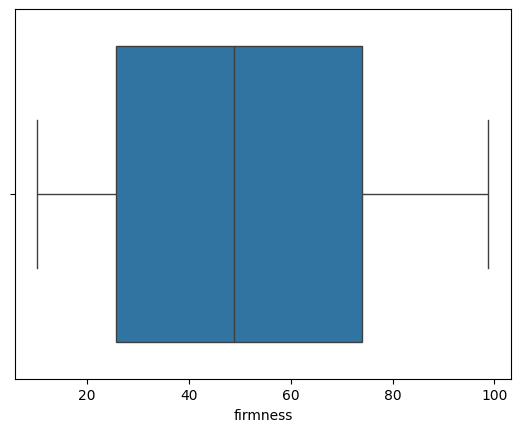

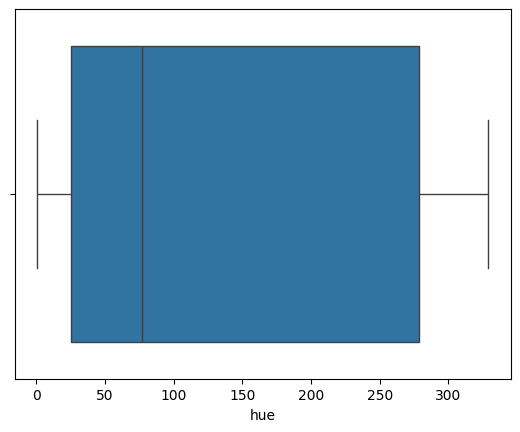

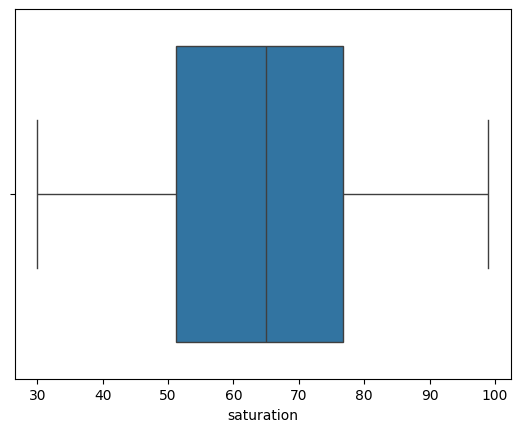

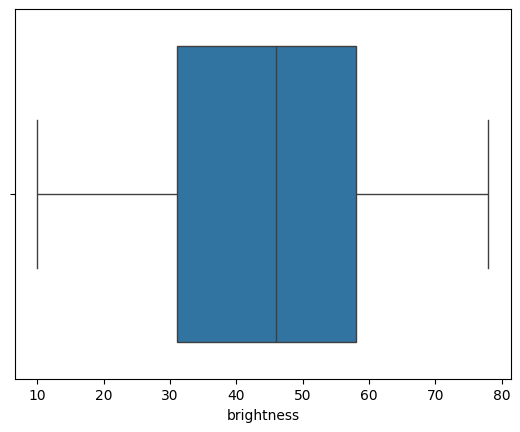

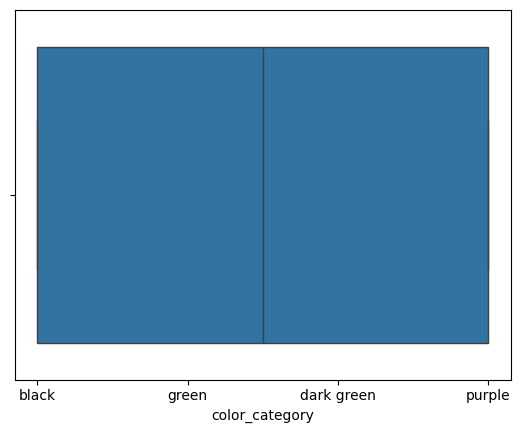

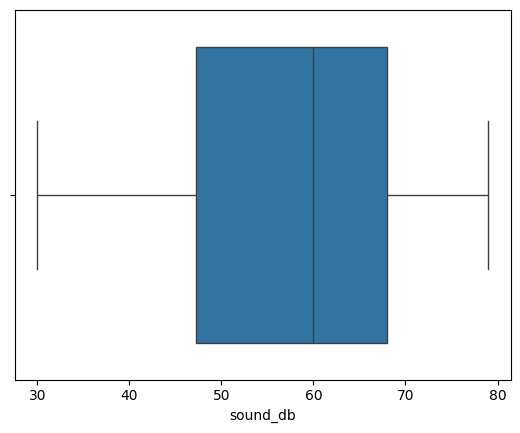

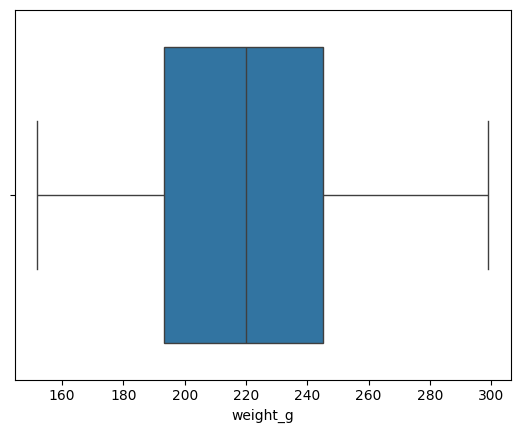

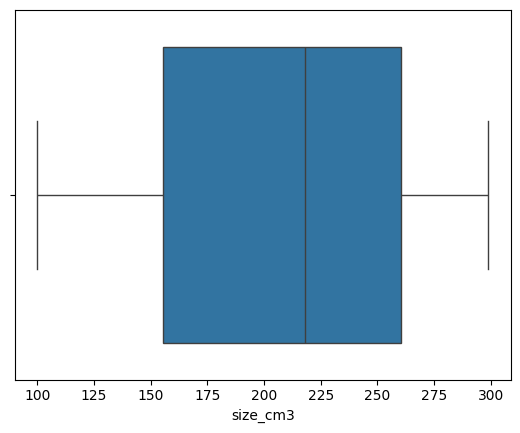

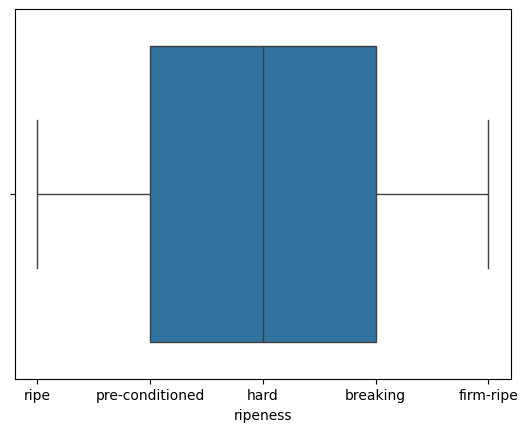

In [8]:
for col in df.columns:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.show()

In [9]:
df.nunique()

firmness          218
hue               124
saturation         65
brightness         65
color_category      4
sound_db           46
weight_g          116
size_cm3          138
ripeness            5
dtype: int64

In [10]:
df = pd.get_dummies(df, columns=['color_category'], drop_first=True)
df.head()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3,ripeness,color_category_dark green,color_category_green,color_category_purple
0,14.5,19,40,26,34,175,261,ripe,False,False,False
1,71.7,53,69,75,69,206,185,pre-conditioned,False,True,False
2,88.5,60,94,46,79,220,143,hard,True,False,False
3,93.8,105,87,41,75,299,140,hard,True,False,False
4,42.5,303,58,32,63,200,227,breaking,False,False,True


In [11]:
# Since we want to predict ripeness, we will use LabelEncoder

from sklearn.preprocessing import LabelEncoder


encoder = LabelEncoder()
df['ripeness'] = encoder.fit_transform(df['ripeness'])
df.head()

,firmness,hue,saturation,brightness,sound_db,weight_g,size_cm3,ripeness,color_category_dark green,color_category_green,color_category_purple
0,14.5,19,40,26,34,175,261,4,False,False,False
1,71.7,53,69,75,69,206,185,3,False,True,False
2,88.5,60,94,46,79,220,143,2,True,False,False
3,93.8,105,87,41,75,299,140,2,True,False,False
4,42.5,303,58,32,63,200,227,0,False,False,True


## Decision Forest

In [12]:
df.dtypes

firmness                     float64
hue                            int64
saturation                     int64
brightness                     int64
sound_db                       int64
weight_g                       int64
size_cm3                       int64
ripeness                       int64
color_category_dark green       bool
color_category_green            bool
color_category_purple           bool
dtype: object

interval columns not set, guessing: ['firmness', 'hue', 'saturation', 'brightness', 'sound_db', 'weight_g', 'size_cm3', 'ripeness']


<Axes: >

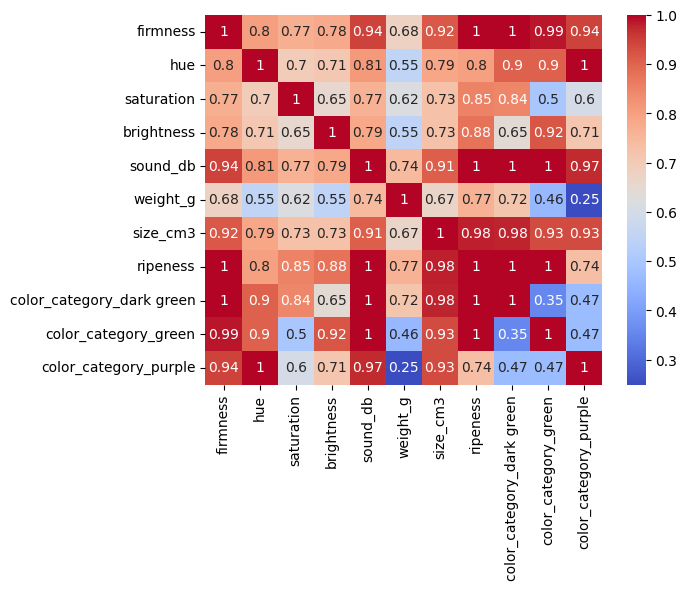

In [13]:
from phik import phik_matrix

corr = df.phik_matrix()
sns.heatmap(corr, cmap='coolwarm', annot=True)

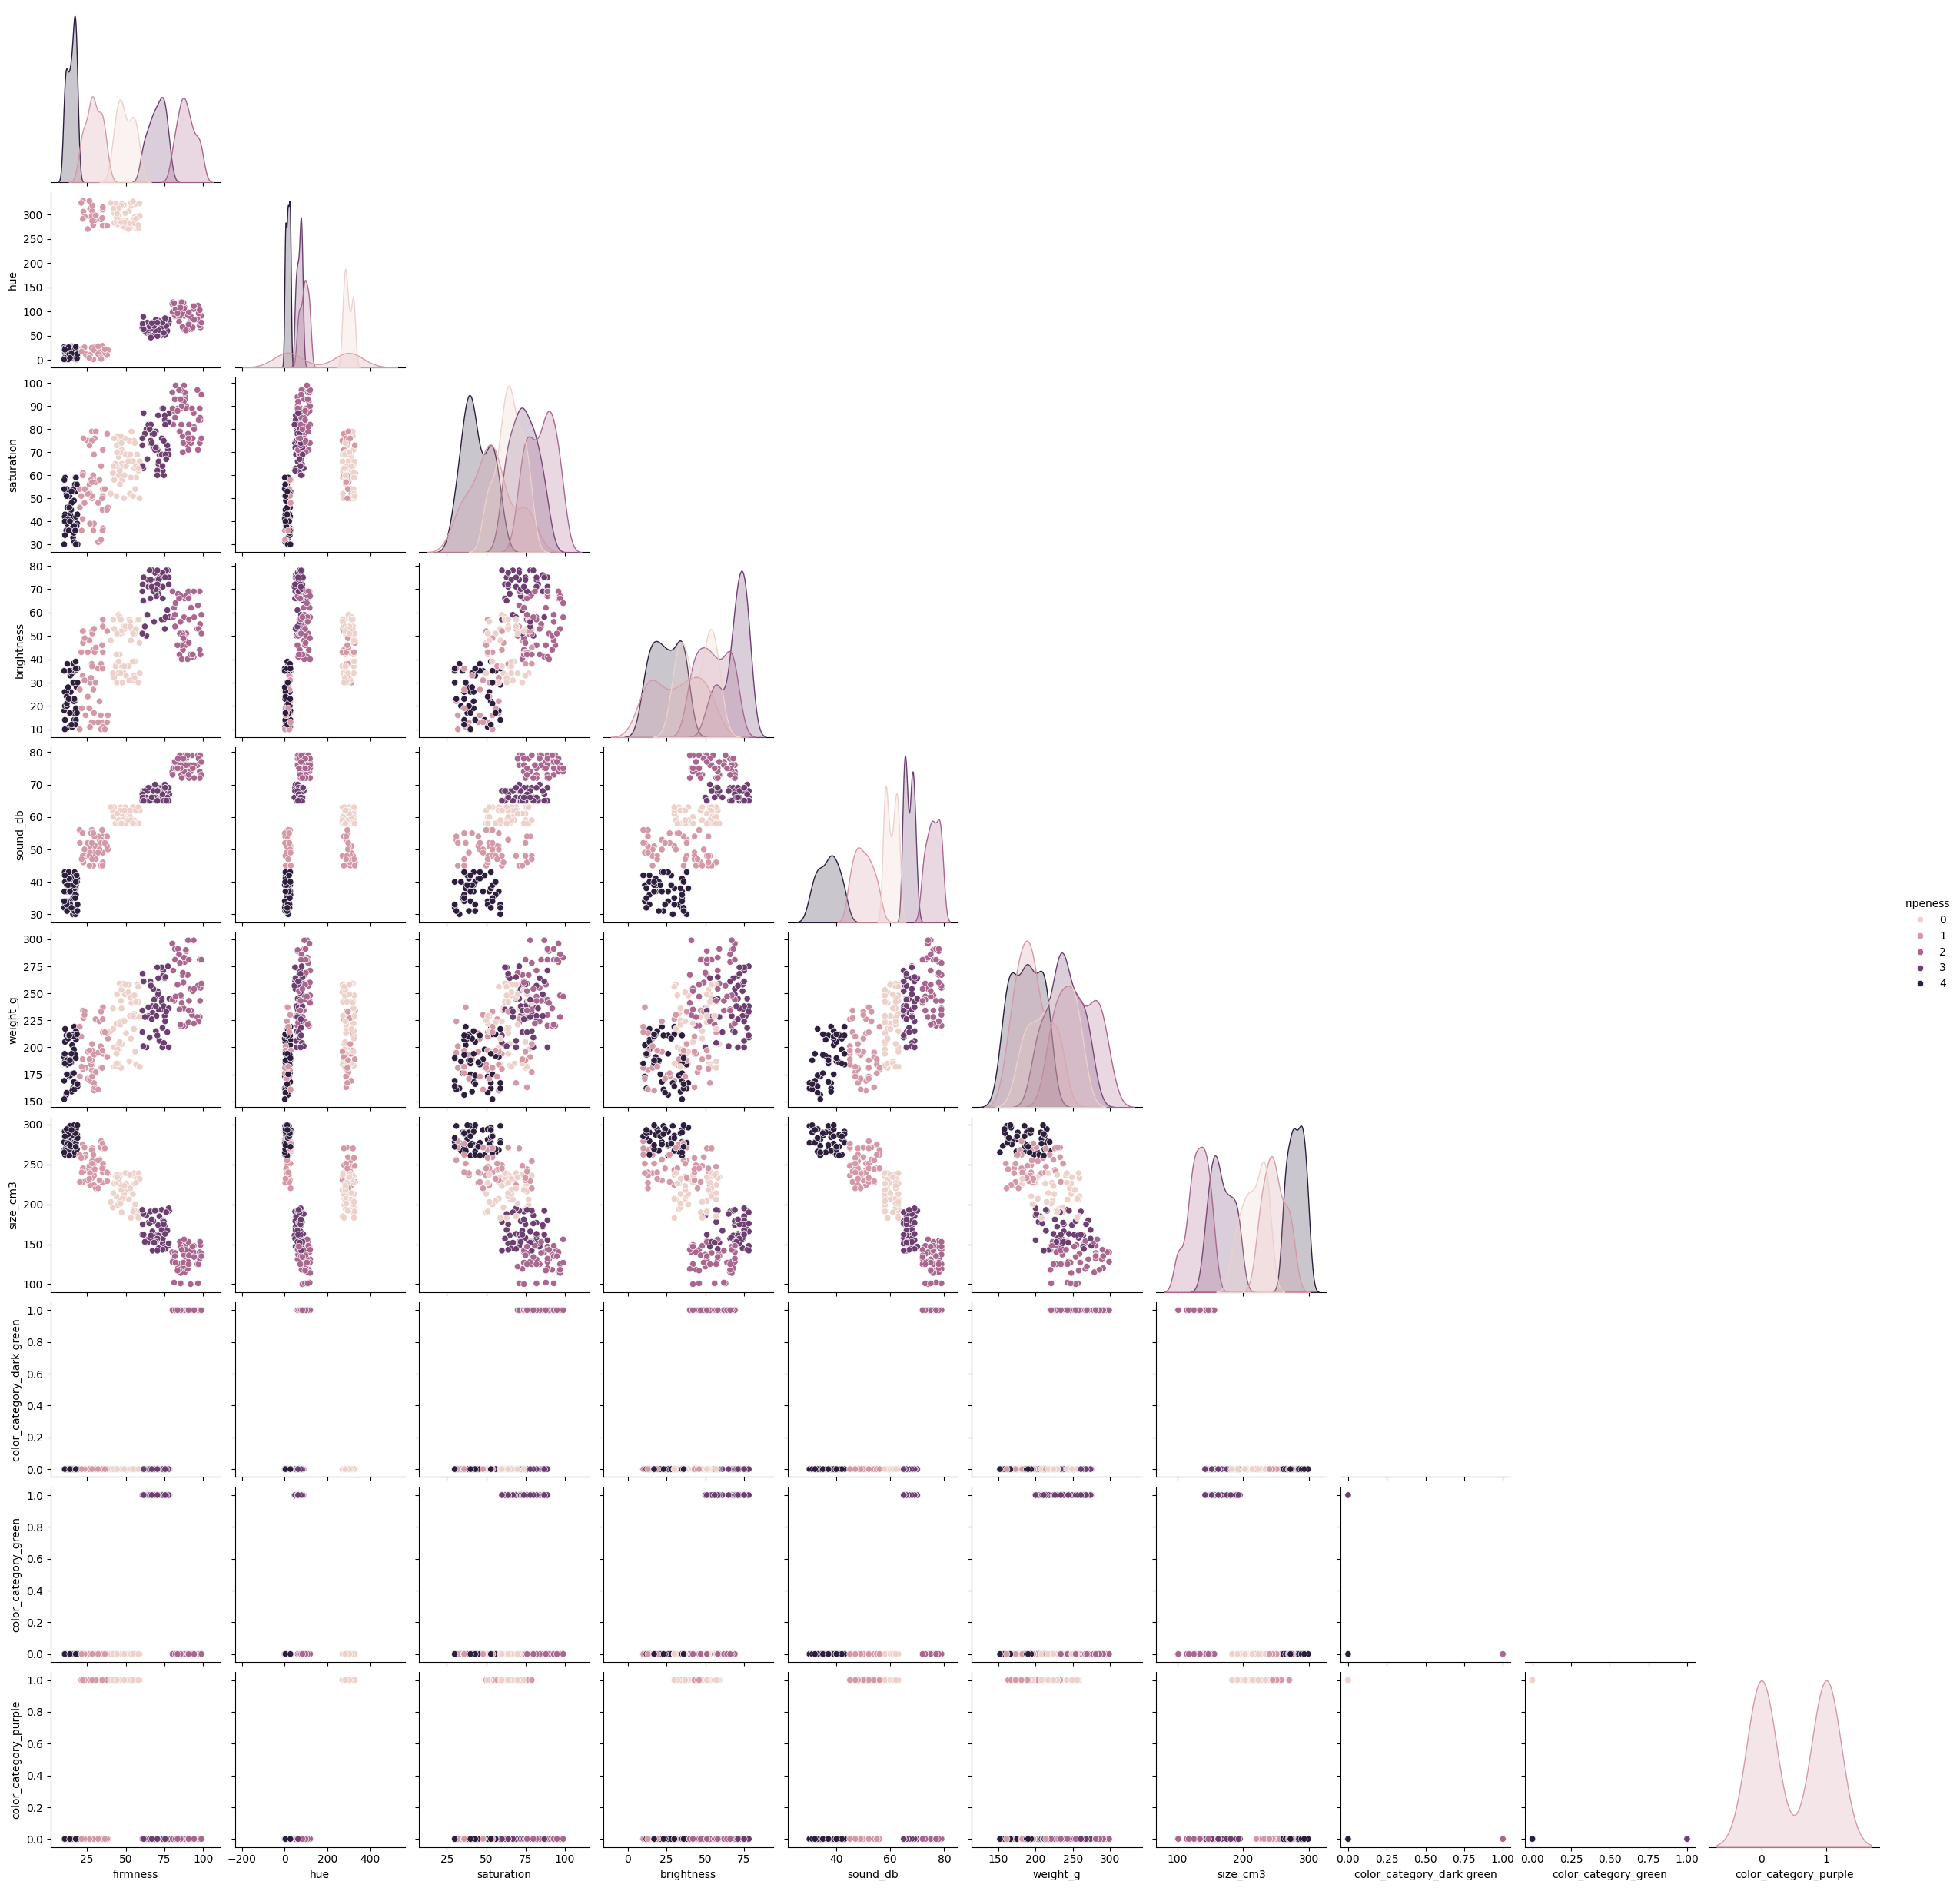

In [21]:
# Assuming df includes 'target' as your label
sns.pairplot(df, hue='ripeness', corner=True)
plt.show()

In [ ]:
# Splitting
from sklearn.model_selection import train_test_split

target = 'ripeness'
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Baseline Random Forest Model

from sklearn.ensemble import RandomForestClassifier

baselineModel = RandomForestClassifier(random_state=42)
baselineModel.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 1.0
Classification_Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



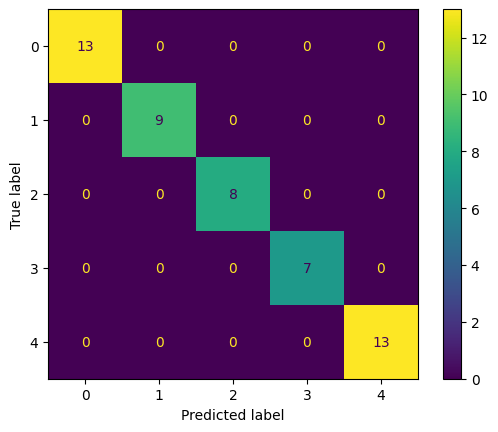

In [19]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = baselineModel.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification_Report: \n{classification_report(y_test, y_pred)}")

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [24]:
# Tuned Model

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'criterion': ['entropy', 'gini'],
    'max_depth': [None, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None], 
}

tunedModel = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=1)
tunedModel.fit(X_train, y_train)
tunedModelV1 = tunedModel.best_estimator_

Fitting 3 folds for each of 96 candidates, totalling 288 fits


In [25]:
y_pred = tunedModelV1.predict(X_test)
print(f"Best Parameters: {tunedModel.best_params_}")
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Classification_Report: \n{classification_report(y_test, y_pred)}")

Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 1.0
Classification_Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         8
           3       1.00      1.00      1.00         7
           4       1.00      1.00      1.00        13

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

